# 선형 모델과 비선형 특성

초평면 이용하기

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


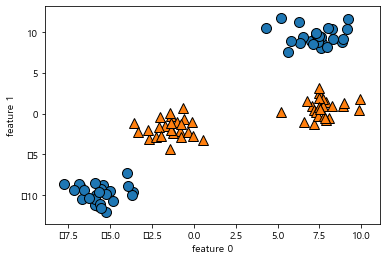

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

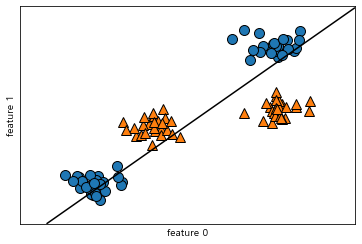

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이러한 모양의 데이터 셋에는 잘 들어 맞지않음. 

두 번째 특성을 제곱한 특성1^2 를 새로운 특성으로 추가해 입력 특성을 확장하여 진행해보기로함. 이제 (특성0, 특성1) 2차원 데이터 포인트가 아니라 (특성0, 특성1, 특성1^2)의 3차원 데이터 포인트로 표현됨.

Text(0.5, 0, 'feature 1 ** 2')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


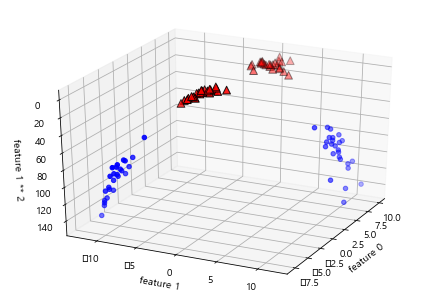

In [5]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그림.
mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask, 2], c = 'b')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 1 ** 2')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


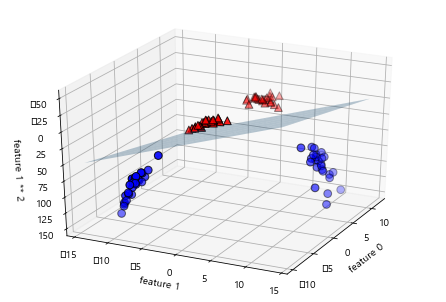

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask, 2], c = 'b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

Text(0, 0.5, 'feature 1')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


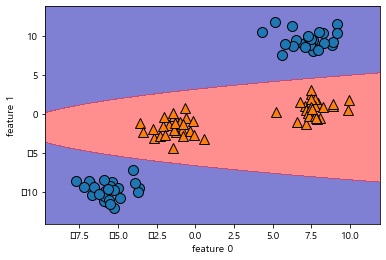

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

커널 기법

위의 예시에서는 데이터셋에 비선형 특성을 추가하여 선형 모델을 만들었다. 비선형 특성이 더 커지면 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커진다. 이를 해결하기위해 수학적 기교를 사용하여 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시키는 커널 기법이라는 방법을 사용함. 이 방법은 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산함.

서포트 벡터 머신에서 데이터를 고차원공간에 매핑하는데 많이 사용하는 방법은 두 가지이다. 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 **다항식 커널**이 있고 **가우시안 커널**로도 불리우는 RBF 커널이 있다. **가우시안 커널**은 차원이 무한한 특성 공간에 매핑하는 것으로, 설명하기가 좀 더 어려움. 가우시안 커널은 모든 차수의 모든 다항식을 고려한다고 이해하면 좋음. 하지막 특성의 중요도는 고차항이 될수록 줄어듦.

SVM 이해하기

학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 된다. 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 준다. 두 클래스 사이의 경계에 위치한 데이터 포인트들을 서포트 벡터라고 하며 여기서 서포트 벡터 머신이라는 이름이 유래함. 

새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다. 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습한다. 데이터 호인트 사이의 거리는 가우시안 커널에 의해 계산됨.

Text(0, 0.5, 'feature 1')

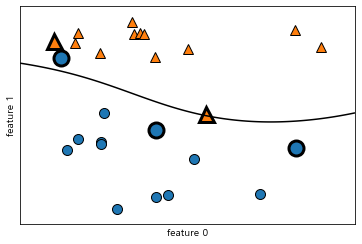

In [9]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

SVM 매개변수 튜닝

gamma 매개변수는 가우시안 커널 폭의 역수에 해당하는 매개변수이다. 이 매개변수가 의미하는 것은 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적이다. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커진다. C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수이다. 이 매개변수는 각 포인트의 중요도를 제한함.

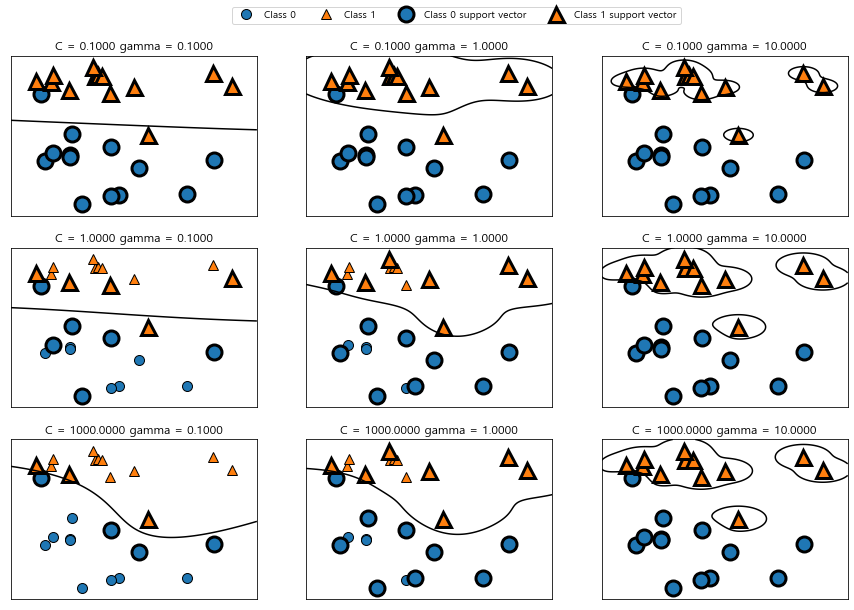

In [11]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["Class 0", "Class 1", "Class 0 support vector", "Class 1 support vector"], ncol=4, loc=(.9,1.2))

왼쪽으로 오른쪽으로 가면서 gamma 매개변수를 0.1에서 10으로 증가시김. 작은 gamma 값은 가우시안 커널의 반경을 크게하여 많은 포인트들이 가까이 있는 것으로 고려된다. 그래서 왼쪽 그림의 결정 경계는 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해짐. 작은 gamma값이 결정 경겨ㅖ를 천천히 바뀌게 하므로 모델의 복잡도를 낮추는 반면에 큰 gamma 값은 더 복잡한 모델을 만든다.

위에서 아래로는 C 매개변수를 0.1에서 1000으로 증가시킴. 선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작다. 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않음. C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류함.

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = tts(cancer.data, cancer.target, random_state=0)

svc = SVC().fit(X_train, y_train)

print("train set accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

train set accuracy: 1.00
test set accuracy: 0.63


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


위 모델은 과대적합됨을 보임. SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감하다. 특히 입력 특성의 범위가 비슷해야함. 각 특성의 최솟값과 최댓값을 로그 스케일로 나타내보자.

Text(0, 0.5, '특성 크기')

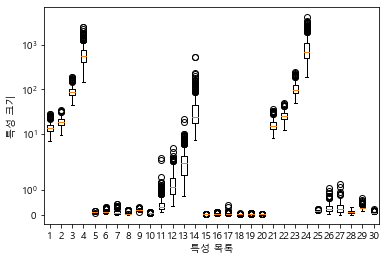

In [16]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

SVM을 위한 데이터 전처리

위의 데이터 스케일이 맞지 않는 문제를 해결하는 방법 하나는 특성 값의 범위가 비슷해지도록 조정하는 것. 커널 SVM에서는 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나, 0과 1 사이로 맞추는 방법을 많이 사용함. 어떤 전처리 방법이 좋은 선택인지는 데이터셋의 성질에 따라 다름. 직접 변환 해보기

In [18]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_train = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_train = (X_train - min_on_train).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1이다.
X_train_scale = (X_train-min_on_train)/range_on_train

print("특성별 최솟값\n", X_train_scale.min(axis=0))
print("특성별 최댓값\n", X_train_scale.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [20]:
# 테스트 셋에도 같은 작업을 적용하지만 훈련 세트에서 계싼한 최솟값과 범위를 사용함.
X_test_scale = (X_test-min_on_train) / range_on_train

svc = SVC().fit(X_train_scale, y_train)

print("train set accuracy: {:.3f}".format(svc.score(X_train_scale, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test_scale, y_test)))

train set accuracy: 0.948
test set accuracy: 0.951


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


데이터의 스케일을 조정하니 결과가 크게 달라짐. 훈련세트와 테스트세트의 정확도가 100%에서는 조금 멀어졌지만 매우 비슷해서 확실히 과소적합된 상태이다. 여기서 C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있다.

In [21]:
svc =SVC(C=1000).fit(X_train_scale, y_train)
print("train set accuracy: {:.3f}".format(svc.score(X_train_scale, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test_scale, y_test)))

train set accuracy: 0.988
test set accuracy: 0.972


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C 값을 증가시켰더니 모델의 성능이 97.2%로 향상됨.

SVM은 강력한 모델이며 다양한 데이터셋이서 잘 작동함. 데이터의 특성이 몇개 안되더라도 복잡한 결정 경계를 만들 수 있다. 저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음. SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야한다는 점이다. 그리고 모델을 분석하는데에 어려움도 있다. 하지만 모든 특성이 비슷한 단위이고 스케일이 비슷하면 SVM을 시도해볼 만하다.

커널 SVM에서 중요한 매개변수는 규제 매개변수 C이고 어떤 커널을 사용할지와 각 커널에 따른 매개변수이다. RBF 커널은 가우시안 커널 폭의 역수인 gamma 매개변수를 하나 가짐. gammam와 C 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만든다.